In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("pitch_movement_CB.csv")

print(df.shape)
print(df.keys())
df.head()

(236, 24)
Index(['year', 'last_name', ' first_name', 'pitcher_id', 'team_name',
       'team_name_abbrev', 'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per', 'pitch_type',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'diff_z',
       'rise', 'pitcher_break_x', 'league_break_x', 'diff_x', 'tail',
       'percent_rank_diff_z', 'percent_rank_diff_x'],
      dtype='object')


,year,last_name,first_name,pitcher_id,team_name,team_name_abbrev,pitch_hand,avg_speed,pitches_thrown,total_pitches,...,pitcher_break_z,league_break_z,diff_z,rise,pitcher_break_x,league_break_x,diff_x,tail,percent_rank_diff_z,percent_rank_diff_x
0,2022,Morton,Charlie,450203,Braves,ATL,R,81.3,1102,2903,...,51.1,-48.7,2.4,5,15.5,10.4,5.1,50,0.710638,0.923404
1,2022,Wainwright,Adam,425794,Cardinals,STL,R,72.8,995,3133,...,67.5,-65.6,2.0,3,16.1,11.0,5.1,46,0.689362,0.923404
2,2022,Wright,Kyle,657140,Braves,ATL,R,84.7,918,2697,...,46.6,-46.1,0.5,1,9.0,6.9,2.2,31,0.510638,0.770213
3,2022,Valdez,Framber,664285,Astros,HOU,L,79.1,846,3018,...,60.5,-54.1,6.4,12,11.7,8.5,3.3,39,0.953191,0.851064
4,2022,Pivetta,Nick,601713,Red Sox,BOS,R,77.2,834,3082,...,65.3,-58.4,6.8,12,7.9,8.2,-0.3,-3,0.961702,0.489362


In [4]:
del df['year']
del df['team_name']
del df['pitches_per_game']
del df['pitch_per']
del df['league_break_z']
del df['diff_z']
del df['rise']
del df['league_break_x']
del df['diff_x']
del df['tail']
del df['percent_rank_diff_z']
del df['percent_rank_diff_x']

In [5]:
print(df.keys())

Index(['last_name', ' first_name', 'pitcher_id', 'team_name_abbrev',
       'pitch_hand', 'avg_speed', 'pitches_thrown', 'total_pitches',
       'pitch_type', 'pitch_type_name', 'pitcher_break_z', 'pitcher_break_x'],
      dtype='object')


In [6]:
df["name"] = df[" first_name"].str.cat(df["last_name"], sep=" ")

cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('name')))
df = df.reindex(columns= cols)

In [7]:
df.rename(columns={'pitcher_break_z':'vertical_break','pitcher_break_x':'horizonal_break','team_name_abbrev':'team_name'},inplace=True)

In [8]:
df.to_csv('curveball_data.csv', index=False)

# EDA

In [9]:
df.describe()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,614389.309322,79.324153,269.076271,1523.377119,53.385169,8.799576
std,64633.693178,3.247934,189.915621,796.928581,7.148313,4.036150
min,425794.000000,71.300000,38.000000,493.000000,32.800000,0.600000
25%,594432.000000,77.100000,136.500000,848.000000,48.900000,6.375000
50%,641541.500000,79.350000,226.500000,1196.000000,52.950000,8.450000
75%,664081.750000,81.300000,345.250000,2180.250000,58.200000,11.300000
max,686610.000000,88.100000,1102.000000,3274.000000,73.200000,19.900000


In [10]:
269/1523

#In 2022, MLB pitchers threw 38% four seam fastball in average

0.17662508207485225

In [11]:
df.corr()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
pitcher_id,1.000000,0.070146,-0.221381,-0.137330,-0.029399,-0.135915
avg_speed,0.070146,1.000000,0.026303,-0.110710,-0.721499,-0.372125
pitches_thrown,-0.221381,0.026303,1.000000,0.672662,0.027600,0.075391
total_pitches,-0.137330,-0.110710,0.672662,1.000000,0.141991,-0.042405
vertical_break,-0.029399,-0.721499,0.027600,0.141991,1.000000,0.181211
horizonal_break,-0.135915,-0.372125,0.075391,-0.042405,0.181211,1.000000


<AxesSubplot:>

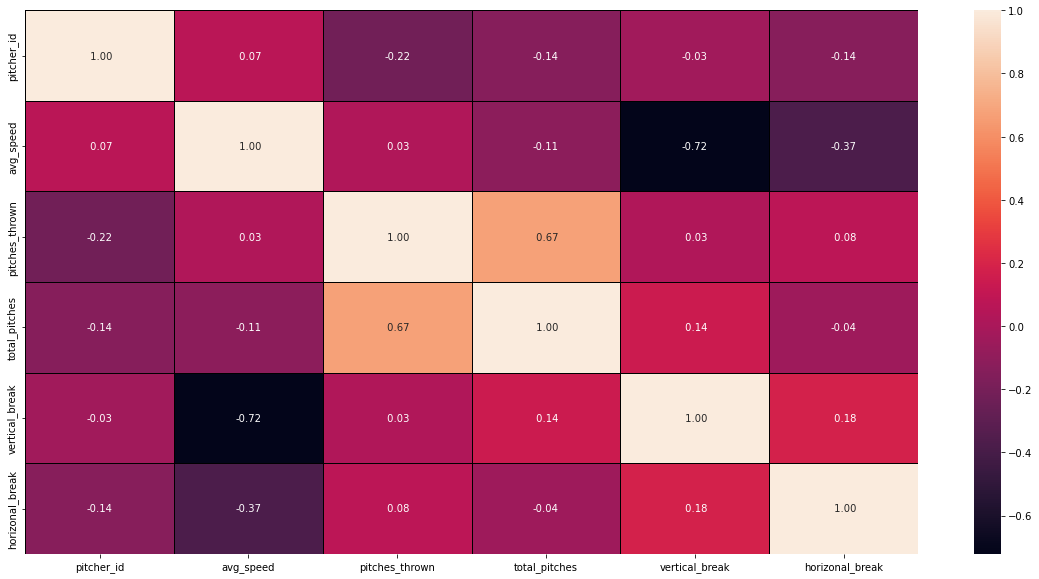

In [12]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

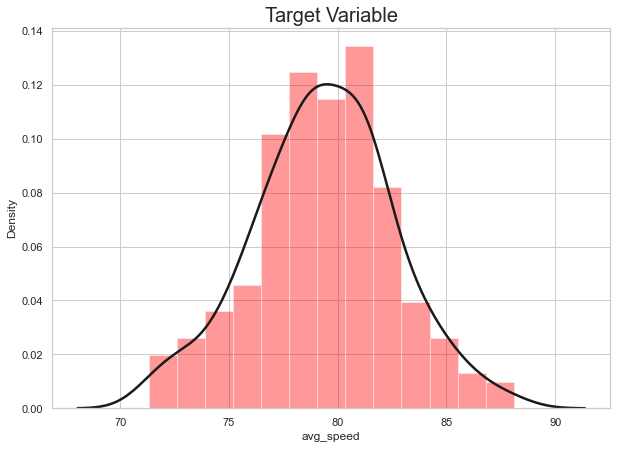

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['avg_speed'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

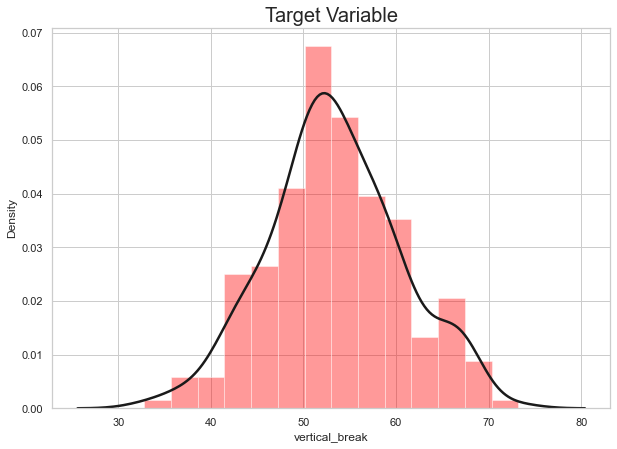

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['vertical_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

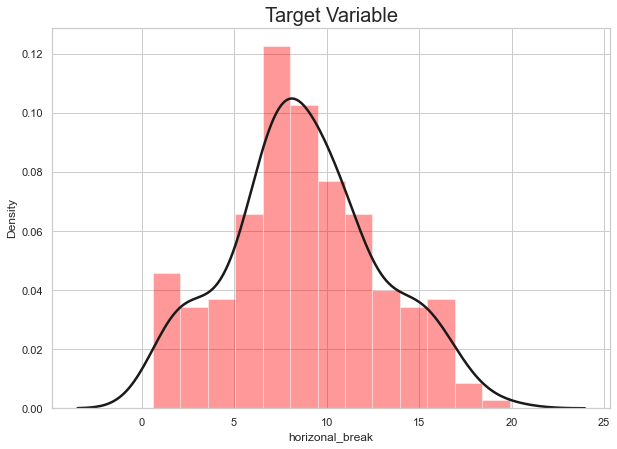

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['horizonal_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

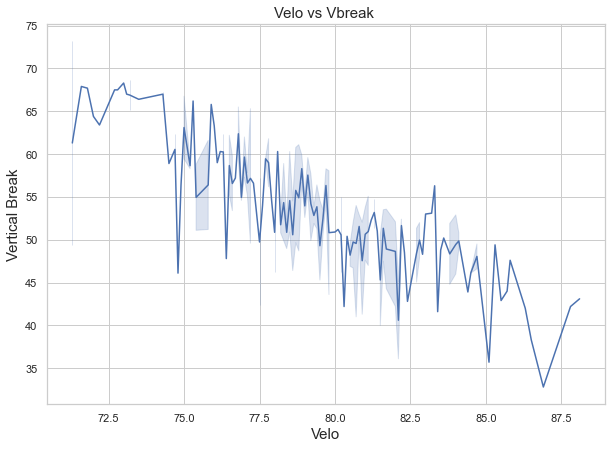

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='avg_speed', y='vertical_break')
plt.title('Velo vs Vbreak ', fontsize=15)
plt.xlabel('Velo', fontsize=15)
plt.ylabel('Vertical Break',fontsize=15)
plt.show()

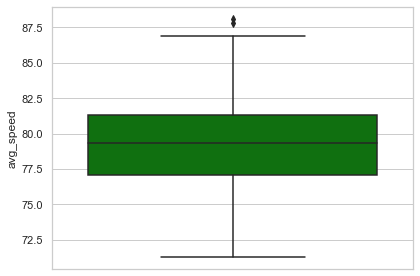

In [17]:
sns.boxplot(y=df['avg_speed'], color='green', orient='x')
plt.tight_layout()

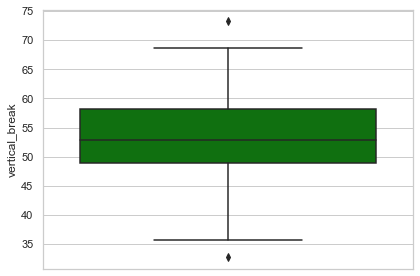

In [18]:
sns.boxplot(y=df['vertical_break'], color='green', orient='x')
plt.tight_layout()

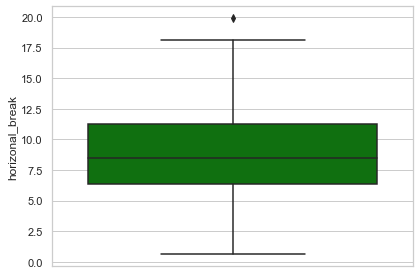

In [19]:
sns.boxplot(y=df['horizonal_break'], color='green', orient='x')
plt.tight_layout()

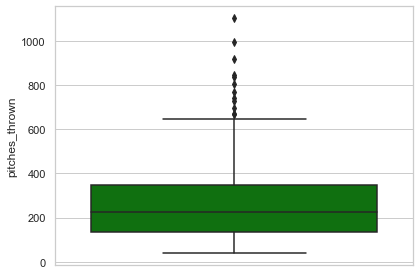

In [20]:
sns.boxplot(y=df['pitches_thrown'], color='green', orient='x')
plt.tight_layout()

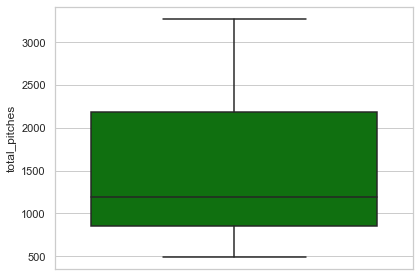

In [21]:
sns.boxplot(y=df['total_pitches'], color='green', orient='x')
plt.tight_layout()